In [1]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
df = pd.read_csv('.\data\gbpusd_6m_may9th.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33953 entries, 0 to 33952
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DateTime  33953 non-null  object 
 1   Open      33953 non-null  float64
 2   High      33953 non-null  float64
 3   Low       33953 non-null  float64
 4   Close     33953 non-null  float64
 5   Volume    33953 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.6+ MB


In [4]:
df.head()

,DateTime,Open,High,Low,Close,Volume
0,2020-11-09 00:00:00,1.31797,1.31798,1.31731,1.31752,1005884032
1,2020-11-09 00:05:00,1.31751,1.31760,1.31702,1.31716,899025024
2,2020-11-09 00:10:00,1.31711,1.31727,1.31676,1.31720,772915968
3,2020-11-09 00:15:00,1.31720,1.31752,1.31704,1.31749,647590016
4,2020-11-09 00:20:00,1.31748,1.31786,1.31739,1.31758,955811008


In [5]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [6]:
df.head()

,DateTime,Open,High,Low,Close,Volume
0,2020-11-09 00:00:00,1.31797,1.31798,1.31731,1.31752,1005884032
1,2020-11-09 00:05:00,1.31751,1.31760,1.31702,1.31716,899025024
2,2020-11-09 00:10:00,1.31711,1.31727,1.31676,1.31720,772915968
3,2020-11-09 00:15:00,1.31720,1.31752,1.31704,1.31749,647590016
4,2020-11-09 00:20:00,1.31748,1.31786,1.31739,1.31758,955811008


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33953 entries, 0 to 33952
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  33953 non-null  datetime64[ns]
 1   Open      33953 non-null  float64       
 2   High      33953 non-null  float64       
 3   Low       33953 non-null  float64       
 4   Close     33953 non-null  float64       
 5   Volume    33953 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 1.6 MB


In [8]:
df = df.set_index('DateTime')

In [9]:
df['target3'] = df['Close'].shift(-3)


In [10]:
df['ema8'] = ta.EMA(df['Close'], timeperiod = 8)
df['ema21'] = ta.EMA(df['Close'], timeperiod = 21)
df['ema50'] = ta.EMA(df['Close'], timeperiod = 50)
df['ema200'] = ta.EMA(df['Close'], timeperiod = 200)

In [11]:
df['slowk'], df['slowd'] = ta.STOCH(df.High, df.Low, df.Close,
                                   fastk_period=14, slowk_period=1, slowd_period=5)

In [12]:
df = df.dropna()

In [13]:
import mplfinance as mpf

In [14]:
df.head()

,Open,High,Low,Close,Volume,target3,ema8,ema21,ema50,ema200,slowk,slowd
DateTime,,,,,,,,,,,,
2020-11-09 16:35:00,1.31403,1.31449,1.31366,1.31401,2147483647,1.31318,1.313857,1.314705,1.315726,1.316918,45.945946,37.985294
2020-11-09 16:40:00,1.31401,1.31415,1.31291,1.31306,1737888000,1.31349,1.313680,1.314556,1.315622,1.316880,35.097493,38.956555
2020-11-09 16:45:00,1.31307,1.31315,1.31208,1.31255,2147483647,1.31340,1.313429,1.314373,1.315501,1.316837,20.891365,36.084735
2020-11-09 16:50:00,1.31254,1.31318,1.31235,1.31318,2147483647,1.31393,1.313373,1.314265,1.315410,1.316800,38.440111,36.500030
2020-11-09 16:55:00,1.31318,1.31395,1.31301,1.31349,1887876992,1.31395,1.313399,1.314194,1.315335,1.316767,47.075209,37.490025


The central price level – the pivot point – is calculated as a function of the market’s high, low, and close from the previous day (or period, more generally). These values are summed and divided by three. This is the same concept as the “typical price”.

Pivot Point = [High (previous) + Low (previous) + Close (previous)] / 3

The other six price levels – three support levels and three resistance levels – all use the value of the pivot point as part of their calculations.

The three support levels are conveniently termed support 1, support 2, and support 3. The three resistance levels are referred to as resistance 1, resistance 2, and resistance 3. You may also see them called by their shorthand forms – S1, S2, S3, and R1, R2, R3, respectively.

These values are calculated as follows:

Resistance 1 = (2 x Pivot Point) – Low (previous period)
Support 1 = (2 x Pivot Point) – High (previous period)
Resistance 2 = (Pivot Point – Support 1) + Resistance 1
Support 2 = Pivot Point – (Resistance 1 – Support 1)
Resistance 3 = (Pivot Point – Support 2) + Resistance 2
Support 3 = Pivot Point – (Resistance 2 – Support 2)

In [15]:
len(df)

33751

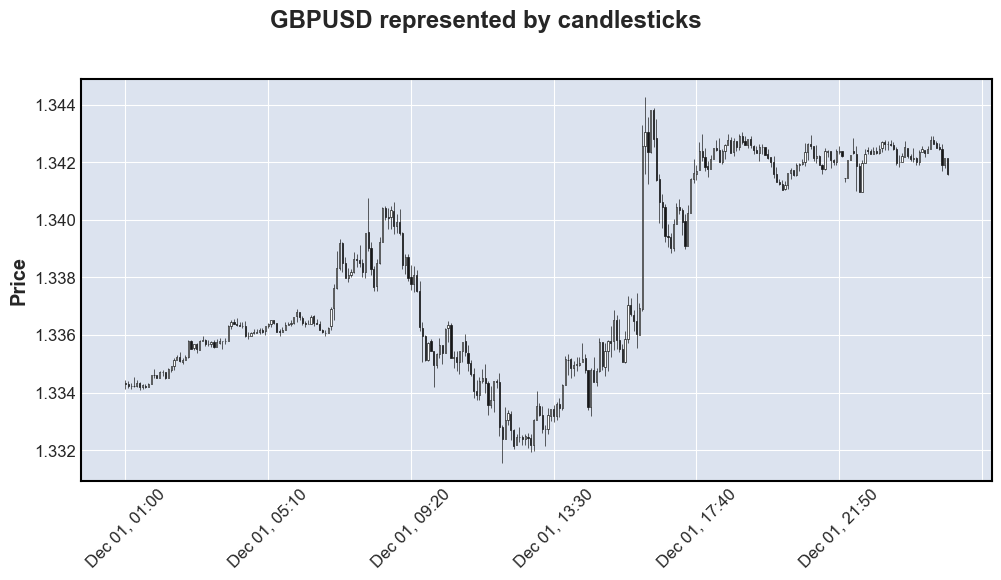

C:\Users\Neel\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Neel\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


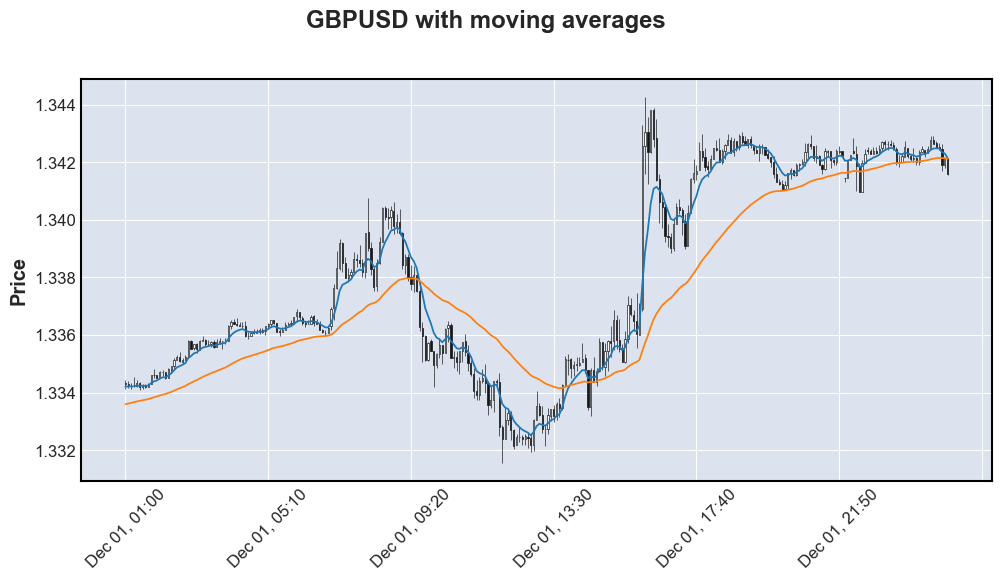

In [16]:
tcdf = df['2020-12-01 01:00:00':'2020-12-02 01:00:00'][['ema8','ema50']]  # DataFrame with two columns
apd  = mpf.make_addplot(tcdf)
mpf.plot(df['2020-12-01 01:00:00':'2020-12-02 01:00:00'], type='candle', title='GBPUSD represented by candlesticks', figratio=(22,10))
mpf.plot(df['2020-12-01 01:00:00':'2020-12-02 01:00:00'], type='candle', title='GBPUSD with moving averages', figratio=(22,10), addplot=apd)

# mpf.plot(stored_df['09-25-2020':'10-01-2020'],type='candle',volume=False,
#          show_nontrading=False, figratio=(16,10), style='charles', addplot=apd)

In [17]:
from sklearn.preprocessing import MinMaxScaler
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
C:\Users\Neel\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Neel\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Neel\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Neel\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [18]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_mse'])
    plt.plot(history['mse'])
    plt.legend(['val_mse', 'mse'])
    plt.title('Acc')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.show()

In [19]:
combined_df = df.copy()

In [20]:
# split into train / test - 2/3 for train, 1/3 for test
ema_50_train = combined_df['ema50'].iloc[:22300]
ema_50_test = combined_df['ema50'].iloc[22301:]
ema_200_train = combined_df['ema200'].iloc[:22300]
ema_200_test = combined_df['ema200'].iloc[22301:]
close_train = combined_df['Close'].iloc[:22300]
close_test = combined_df['Close'].iloc[22301:]
target3_train = combined_df['target3'].iloc[:22300]
target3_test = combined_df['target3'].iloc[22301:]

# #adding additional train / test splits for the rest of the models
ema_8_train = combined_df['ema8'].iloc[:22300]
ema_8_test = combined_df['ema8'].iloc[22301:]
ema_21_train = combined_df['ema21'].iloc[:22300]
ema_21_test = combined_df['ema21'].iloc[22301:]
# b_upper_train = combined_df['upperband'].iloc[:22300]
# b_upper_test = combined_df['upperband'].iloc[22301:]
# b_lower_train = combined_df['lowerband'].iloc[:22300]
# b_lower_test = combined_df['lowerband'].iloc[22301:]
# b_mid_train = combined_df['middleband'].iloc[:22300]
# b_mid_test = combined_df['middleband'].iloc[22301:]
stochk_train = combined_df['slowk'].iloc[:22300]
stochk_test = combined_df['slowk'].iloc[22301:]
stochd_train = combined_df['slowd'].iloc[:22300]
stochd_test = combined_df['slowd'].iloc[22301:]

open_train = combined_df['Open'].iloc[:22300]
open_test = combined_df['Open'].iloc[22301:]
high_train = combined_df['High'].iloc[:22300]
high_test = combined_df['High'].iloc[22301:]
low_train = combined_df['Low'].iloc[:22300]
low_test = combined_df['Low'].iloc[22301:]

In [21]:
# Reshape training data
ema_50_array = np.array(ema_50_train).reshape((len(ema_50_train), 1))
ema_200_array = np.array(ema_200_train).reshape((len(ema_200_train), 1))
close_array = np.array(close_train).reshape((len(close_train), 1))
target3_array = np.array(target3_train).reshape((len(target3_train), 1))

#reshaping additional features for the rest of the models
ema_8_array = np.array(ema_8_train).reshape((len(ema_8_train), 1))
ema_21_array = np.array(ema_21_train).reshape((len(ema_21_train), 1))

# b_upper_array = np.array(b_upper_train).reshape((len(b_upper_train), 1))
# b_lower_array = np.array(b_lower_train).reshape((len(b_lower_train), 1))
# b_mid_array = np.array(b_mid_train).reshape((len(b_mid_train), 1))
stochk_array = np.array(stochk_train).reshape((len(stochk_train), 1))
stochd_array = np.array(stochd_train).reshape((len(stochd_train), 1))

open_array = np.array(open_train).reshape((len(open_train), 1))
high_array = np.array(high_train).reshape((len(high_train), 1))
low_array = np.array(low_train).reshape((len(low_train), 1))

In [22]:
t_ema_50_array = np.array(ema_50_test).reshape((len(ema_50_test), 1))
t_ema_200_array = np.array(ema_200_test).reshape((len(ema_200_test), 1))
t_close_array = np.array(close_test).reshape((len(close_test), 1))
t_target3_array = np.array(target3_test).reshape((len(target3_test), 1))


t_ema_8_array = np.array(ema_8_test).reshape((len(ema_8_test), 1))
t_ema_21_array = np.array(ema_21_test).reshape((len(ema_21_test), 1))

# t_b_upper_array = np.array(b_upper_test).reshape((len(b_upper_test), 1))
# t_b_lower_array = np.array(b_lower_test).reshape((len(b_lower_test), 1))
# t_b_mid_array = np.array(b_mid_test).reshape((len(b_mid_test), 1))
t_stochk_array = np.array(stochk_test).reshape((len(stochk_test), 1))
t_stochd_array = np.array(stochd_test).reshape((len(stochd_test), 1))

t_open_array = np.array(open_test).reshape((len(open_test), 1))
t_high_array = np.array(high_test).reshape((len(high_test), 1))
t_low_array = np.array(low_test).reshape((len(low_test), 1))

In [23]:
# Scale data onto [0,1]
scaler = MinMaxScaler(feature_range = (0,1))

# Transform data
ema_50_training_scaled = scaler.fit_transform(ema_50_array)
ema_200_training_scaled = scaler.fit_transform(ema_200_array)
close_training_scaled = scaler.fit_transform(close_array)
target3_training_scaled = scaler.fit_transform(target3_array)


ema_8_training_scaled = scaler.fit_transform(ema_8_array)
ema_21_training_scaled = scaler.fit_transform(ema_21_array)

# b_upper_training_scaled = scaler.fit_transform(b_upper_array)
# b_lower_training_scaled = scaler.fit_transform(b_lower_array)
# b_mid_training_scaled = scaler.fit_transform(b_mid_array)
stochk_training_scaled = scaler.fit_transform(stochk_array)
stochd_training_scaled = scaler.fit_transform(stochd_array)

open_training_scaled = scaler.fit_transform(open_array)
high_training_scaled = scaler.fit_transform(high_array)
low_training_scaled = scaler.fit_transform(low_array)

In [24]:
ema_50_test_scaled = scaler.fit_transform(t_ema_50_array)
ema_200_test_scaled = scaler.fit_transform(t_ema_200_array)
close_test_scaled = scaler.fit_transform(t_close_array)
target3_test_scaled = scaler.fit_transform(t_target3_array)

ema_8_test_scaled = scaler.fit_transform(t_ema_8_array)
ema_21_test_scaled = scaler.fit_transform(t_ema_21_array)

# b_upper_test_scaled = scaler.fit_transform(t_b_upper_array)
# b_lower_test_scaled = scaler.fit_transform(t_b_lower_array)
# b_mid_test_scaled = scaler.fit_transform(t_b_mid_array)
stochk_test_scaled = scaler.fit_transform(t_stochk_array)
stochd_test_scaled = scaler.fit_transform(t_stochd_array)

open_test_scaled = scaler.fit_transform(t_open_array)
high_test_scaled = scaler.fit_transform(t_high_array)
low_test_scaled = scaler.fit_transform(t_low_array)

In [25]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [26]:
# define input sequence
in_seq1 = ema_50_training_scaled
in_seq2 = ema_200_training_scaled

in_seq3 = ema_8_training_scaled
in_seq4 = ema_21_training_scaled

# in_seq5 = b_upper_training_scaled
# in_seq6 = b_lower_training_scaled
# in_seq7 = b_mid_training_scaled
in_seq7 = stochk_training_scaled
in_seq8 = stochd_training_scaled

in_seq9 = open_training_scaled
in_seq10 = high_training_scaled
in_seq11 = low_training_scaled
in_seq12 = close_training_scaled

out_seq = target3_training_scaled
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
# in_seq5 = in_seq5.reshape((len(in_seq5), 1))
# in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq11), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

In [27]:
# define test input sequence
t_in_seq1 = ema_50_test_scaled
t_in_seq2 = ema_200_test_scaled

t_in_seq3 = ema_8_test_scaled
t_in_seq4 = ema_21_test_scaled

# t_in_seq5 = b_upper_test_scaled
# t_in_seq6 = b_lower_test_scaled
# t_in_seq7 = b_mid_test_scaled
t_in_seq7 = stochk_test_scaled
t_in_seq8 = stochd_test_scaled

t_in_seq9 = open_test_scaled
t_in_seq10 = high_test_scaled
t_in_seq11 = low_test_scaled
t_in_seq12 = close_test_scaled
t_out_seq = target3_test_scaled



# convert to [rows, columns] structure
t_in_seq1 = t_in_seq1.reshape((len(t_in_seq1), 1))
t_in_seq2 = t_in_seq2.reshape((len(t_in_seq2), 1))

t_in_seq3 = t_in_seq3.reshape((len(t_in_seq3), 1))
t_in_seq4 = t_in_seq4.reshape((len(t_in_seq4), 1))
# t_in_seq5 = t_in_seq5.reshape((len(t_in_seq5), 1))
# t_in_seq6 = t_in_seq6.reshape((len(t_in_seq6), 1))
t_in_seq7 = t_in_seq7.reshape((len(t_in_seq7), 1))
t_in_seq8 = t_in_seq8.reshape((len(t_in_seq8), 1))
t_in_seq9 = t_in_seq9.reshape((len(t_in_seq9), 1))
t_in_seq10 = t_in_seq10.reshape((len(t_in_seq10), 1))
t_in_seq11 = t_in_seq11.reshape((len(t_in_seq11), 1))
t_in_seq12 = t_in_seq12.reshape((len(t_in_seq11), 1))
t_out_seq = t_out_seq.reshape((len(t_out_seq), 1))

In [28]:
n_features3 = 10

In [29]:
dataset3 = hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq7, in_seq8, in_seq9, in_seq10, in_seq11, in_seq12, out_seq))
# choose a number of time steps
n_steps = 6
# convert into input/output
X, y = split_sequences(dataset3, n_steps)

In [30]:
# use if wanting to check the shape
# print(X.shape, y.shape)
# # summarize the data
# for i in range(len(X)):
#     print(X[i], y[i])

In [31]:
t_dataset = hstack((t_in_seq1, t_in_seq2, t_in_seq3, t_in_seq4, t_in_seq7, t_in_seq8, t_in_seq9, t_in_seq10, t_in_seq11, t_in_seq12, t_out_seq))
# choose a number of time steps
t_n_steps = 6
# convert into input/output
tX, ty = split_sequences(t_dataset, t_n_steps)

In [32]:
# Build a Sequential keras model
model = Sequential()

# Add our first LSTM layer - 20 nodes

model.add(LSTM(168, return_sequences=True, activation='relu', input_shape=(n_steps, n_features3)))
model.add(LSTM(10, activation='relu', input_shape=(n_steps, n_features3)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mse', 'acc'])

In [54]:
# Fit the model to our data
results3 = model.fit(X, y, epochs=7,validation_data=(X, y), verbose=1)

Train on 22295 samples, validate on 22295 samples
Epoch 1/7
22295/22295 [==============================] - 22s 985us/step - loss: 0.0022 - mse: 0.0022 - acc: 8.9706e-05 - val_loss: 1.0696e-04 - val_mse: 1.0696e-04 - val_acc: 8.9706e-05
Epoch 2/7
22295/22295 [==============================] - 20s 918us/step - loss: 9.3066e-05 - mse: 9.3066e-05 - acc: 8.9706e-05 - val_loss: 8.4598e-05 - val_mse: 8.4598e-05 - val_acc: 8.9706e-05
Epoch 3/7
22295/22295 [==============================] - 20s 887us/step - loss: 9.3353e-05 - mse: 9.3353e-05 - acc: 8.9706e-05 - val_loss: 9.0280e-05 - val_mse: 9.0280e-05 - val_acc: 8.9706e-05
Epoch 4/7
22295/22295 [==============================] - 20s 913us/step - loss: 8.7659e-05 - mse: 8.7659e-05 - acc: 8.9706e-05 - val_loss: 8.3584e-05 - val_mse: 8.3584e-05 - val_acc: 8.9706e-05
Epoch 5/7
22295/22295 [==============================] - 22s 967us/step - loss: 9.0013e-05 - mse: 9.0013e-05 - acc: 8.9706e-05 - val_loss: 8.1663e-05 - val_mse: 8.1663e-05 - val_acc:

In [201]:
#visualize_training_results(results3)

In [55]:
# Generate predictions on test data 
preds_scaled3 = model.predict(tX)

# Convert the predictions back to original scale 
yhat = scaler.inverse_transform(preds_scaled3)
ty_inverse = scaler.inverse_transform(ty.reshape(-1,1))

In [56]:
#RMSE for test data.
np.sqrt(mean_squared_error(ty_inverse, yhat))

0.0007404559351562368

In [48]:
#7.2 pips with 20 epochs and 8 features predicting 15mins ahead (3 5 mins bars ahead) looking back 6 steps
#25pips with 9 epochs and 8 features predicting 4 hours ahead ( 48 5 mins bars ahead) looking back 6 steps
#25pips with 9 epochs and 8 features predicting 4 hours ahead ( 48 5 mins bars ahead) looking back 48 steps
# xpips with 13 epochs, 8 features predicting 1 hour ahead (12 5 minute bars ahead) looking back 39 steps

RMSE: 7.40 pips

In [38]:
import pickle

In [39]:
with open('./data/gbpusd_model4.pickle', 'wb') as f:
    pickle.dump(model, f)

In [40]:
#Read from saved pickle file.
with open('./data/gbpusd_model4.pickle', 'rb') as file:
    gbpusd_model2 = pickle.load(file)
    